In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import style
import seaborn as sns

matplotlib.rc('font', family='NanumGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

In [15]:
df_product = pd.read_csv("./DataSet/master_product_sheet_001.csv", engine='python')
df_product.head(2)

,Unnamed: 0,#,공급사,과세/면세,담기,매입가,상품명(기본),상품코드,재입고알림,카테고리,판매가,품절여부,후기
0,0,1,패커스,과세,0,55440,"실링용기 71호 백색 2,200ml 400개 1박스",2184,사용함,018 : 실링용기\n018002 : 실링용기 > 2319(2318)시리즈\n042...,77480,정상,0
1,1,2,(주)니드코,과세,0,3080,"니드코]국산제품 정식쟁반,병원식판,분식점 돈까스쟁반 업소용 화이트 항균아트쟁반 5호",2181,사용안함,002 : 주방용품\n002002 : 주방용품 > 주방용품\n046 : 주방용품/소...,4950,정상,0


In [16]:
df_product.shape

(1017, 13)

In [17]:
def divide_category(x):
    if '용기' in x['카테고리']:
        return '용기' # 1. 용기(용기 + 실링용기)
    
    elif '식자재' in x['카테고리']:
        return '식자재' # 2. 식자재
    
    elif '실링필름' in x['카테고리']:
        return '실링제품' # 4. 실링제품 (실링필름 + 실링기계)
    
    elif '실링기계' in x['카테고리']:
        return '실링제품'
    
    elif '주방용품' in x['카테고리']:
        return '기타'  # 6. 기타(주방용품, 빨대, 스티커)
    
    elif '빨대' in x['카테고리']:
        return '기타'
    
    elif '스티커' in x['카테고리']:
        return '기타'
    
    elif '카달로그' in x['카테고리']:
        if '용기' in x['상품명(기본)']:
            return '용기'
        
        return '기타'  
    
    elif '소량' in x['카테고리']:
        return '용기'
    
    else:
        return -1
# 주방용품 안에 일회용품 포함
# 카테고리 소량 => 실링 PP 제품 => 실링 용기라고 판단 => 용기에 포함
# 카테고리 카달로그 => 용기는 용기, 냅킨 80밴드는 구매이력 order_list에 없음(100밴드 등은 존재하므로 이건 삭제). product 목록에서 제외

In [18]:
df_product['분류카테고리'] = df_product.T.apply(lambda x: divide_category(x))
df_product

,Unnamed: 0,#,공급사,과세/면세,담기,매입가,상품명(기본),상품코드,재입고알림,카테고리,판매가,품절여부,후기,분류카테고리
0,0,1,패커스,과세,0,55440,"실링용기 71호 백색 2,200ml 400개 1박스",2184,사용함,018 : 실링용기\n018002 : 실링용기 > 2319(2318)시리즈\n042...,77480,정상,0,용기
1,1,2,(주)니드코,과세,0,3080,"니드코]국산제품 정식쟁반,병원식판,분식점 돈까스쟁반 업소용 화이트 항균아트쟁반 5호",2181,사용안함,002 : 주방용품\n002002 : 주방용품 > 주방용품\n046 : 주방용품/소...,4950,정상,0,기타
2,2,3,(주)니드코,과세,10,1120,"니드코]QueenRose 장미 밥공기그릇 /중국집,주방,식당,가정용 깨지지 않는 단...",2180,사용함,002 : 주방용품\n002002 : 주방용품 > 주방용품\n046 : 주방용품/소...,1800,정상,0,기타
3,3,4,(주)니드코,과세,0,5600,니드코 터치미 종이컵디스펜서(자석형) 종이컵보관함,2179,사용안함,002 : 주방용품\n002002 : 주방용품 > 주방용품\n046 : 주방용품/소...,9000,정상,0,기타
4,4,5,(주)니드코,과세,0,42000,니드코 뉴카멜리아 사각수저함(수저통),2178,사용안함,002 : 주방용품\n002002 : 주방용품 > 주방용품\n046 : 주방용품/소...,65000,정상,0,기타
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,1015,1016,패커스,과세,23,44000,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",42,사용함,039 : 중식 용기\n039003 : 중식 용기 > 소스/국/밥용기\n040 : ...,60720,정상,30,용기
1013,1016,1017,패커스,과세,1,89100,"75파이 다용도컵 세트 3호 대 165ml 백색 PS 3,000개 1set(2박스)",41,사용함,039 : 중식 용기\n039003 : 중식 용기 > 소스/국/밥용기\n040 : ...,110570,정상,18,용기
1014,1017,1018,패커스,과세,4,85800,"75파이 다용도컵 세트 3호 소 150ml 백색 PS 3,000개 1set(2박스)",40,사용함,039 : 중식 용기\n039003 : 중식 용기 > 소스/국/밥용기\n040 : ...,106620,정상,2,용기
1015,1018,1019,패커스,과세,6,49500,"70파이 다용도컵 세트 2호 대 80ml 백색 PS 3,000개 1set(2박스)",39,사용함,039 : 중식 용기\n039003 : 중식 용기 > 소스/국/밥용기\n040 : ...,65470,정상,11,용기


In [19]:
# 삭제할 row index 찾기
# 미소크린 테이블냅킨 74매*80밴드
df_product.loc[df_product['상품명(기본)'] == '미소크린 테이블냅킨 74매*80밴드']

,Unnamed: 0,#,공급사,과세/면세,담기,매입가,상품명(기본),상품코드,재입고알림,카테고리,판매가,품절여부,후기,분류카테고리
189,190,191,패커스,과세,0,8480,미소크린 테이블냅킨 74매*80밴드,1968,사용안함,061 : vol.4 Catalogue\n061012 : vol.4 Catalogu...,9500,정상,0,기타


In [20]:
# row 삭제
# 미소크린 테이블냅킨 74매*80밴드 
df_product.drop([189], inplace=True)
df_product.shape

(1016, 14)

In [21]:
df_check = (df_product['분류카테고리'] == -1)

In [22]:
df_check.value_counts() # 모두 분류 잘 완료 됨을 확인

False    1016
Name: 분류카테고리, dtype: int64

In [23]:

df_product.loc[df_product['분류카테고리'] == -1]

,Unnamed: 0,#,공급사,과세/면세,담기,매입가,상품명(기본),상품코드,재입고알림,카테고리,판매가,품절여부,후기,분류카테고리


In [24]:
# 새로 저장하기
df_product.to_csv("master_product_sheet_002.csv", mode = "w")

In [25]:
# df_category = pd.DataFrame(df_product["분류카테고리"])
df_category = df_product["분류카테고리"]
df_category.head()

0    용기
1    기타
2    기타
3    기타
4    기타
Name: 분류카테고리, dtype: object

In [26]:
df_category.value_counts()

식자재     475
용기      363
기타      162
실링제품     16
Name: 분류카테고리, dtype: int64

<BarContainer object of 4 artists>

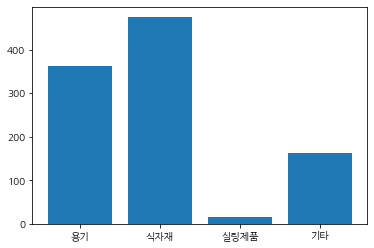

In [27]:
카테고리_x = ["용기","식자재","실링제품","기타"]
카테고리_y = [363, 475, 16, 162]

plt.bar(카테고리_x, 카테고리_y)

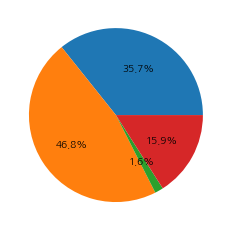

In [29]:
# labels = ['40대', '30대', '20대', '50대', '60대', '70대', '80대']
ratio = [3614, 1902, 821, 125, 36, 18, 5]
# categories = ['40대', '30대', '20대', '50대', '60대', '70대', '80대']
explodes = (0.1, 0, 0)
plt.pie(카테고리_y, autopct="%0.1f%%")
# plt.legend(카테고리_x)
plt.show()

# log_order 과 master_product 상품 코드 기준 합치기

In [19]:
df_order = pd.read_csv("./DataSet/log_order_sheet_001.csv", engine='python')
df_order.head(2)

,Unnamed: 0,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,...,주문자ID,카드사,쿠폰 할인금액,판매가,품목번호,친환경,사은품,회원,주문수량,총수량
0,0,무통장입금,44550.0,교환안함,0,D-20181227-0000648-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,...,pp683,기타,0,71450,42602,False,False,True,1,300
1,1,무통장입금,44000.0,교환안함,0,D-20181229-0000119-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,...,asd0908,기타,0,70620,42930,False,False,True,2,2000


In [20]:
df_order.columns

Index(['Unnamed: 0', '결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보',
       '배송시작일', '배송완료일', '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액',
       '수령인 주소', '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가',
       '품목번호', '친환경', '사은품', '회원', '주문수량', '총수량'],
      dtype='object')

In [21]:
df_product_category = df_product[['상품명(기본)', '분류카테고리']]
df_product_category.rename(columns={'상품명(기본)': '상품명'}, inplace=True)
df_product_category

/home/piai/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,상품명,분류카테고리
0,"실링용기 71호 백색 2,200ml 400개 1박스",용기
1,"니드코]국산제품 정식쟁반,병원식판,분식점 돈까스쟁반 업소용 화이트 항균아트쟁반 5호",기타
2,"니드코]QueenRose 장미 밥공기그릇 /중국집,주방,식당,가정용 깨지지 않는 단...",기타
3,니드코 터치미 종이컵디스펜서(자석형) 종이컵보관함,기타
4,니드코 뉴카멜리아 사각수저함(수저통),기타
...,...,...
1012,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",용기
1013,"75파이 다용도컵 세트 3호 대 165ml 백색 PS 3,000개 1set(2박스)",용기
1014,"75파이 다용도컵 세트 3호 소 150ml 백색 PS 3,000개 1set(2박스)",용기
1015,"70파이 다용도컵 세트 2호 대 80ml 백색 PS 3,000개 1set(2박스)",용기


In [23]:
type(df_product_category['상품번호'][1])

KeyError: '상품번호'

In [24]:
type(df_order['상품번호'][1])

str

In [35]:
df_order = pd.read_csv("./DataSet/log_order_sheet_001.csv", engine='python')

# df_order[df_order["상품번호"] == "2017년 상품번호"]["상품번호"] = -1
df_order.loc[df_order["상품번호"] == "2017년 상품번호", "상품번호"] = -1

df_order[df_order["상품번호"] == -1]["상품명"]

45143    2017년 상품
45152    2017년 상품
45178    2017년 상품
45194    2017년 상품
45196    2017년 상품
           ...   
45416    2017년 상품
45417    2017년 상품
45418    2017년 상품
45421    2017년 상품
45422    2017년 상품
Name: 상품명, Length: 88, dtype: object

In [39]:
# 데이터 형태 맞춰주기
df_order['상품번호'] = df_order['상품번호'].astype(float)
# 데이터 형태 맞춰주기
df_product_category['상품번호'] = df_product_category['상품번호'].astype(float)

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [40]:
type(df_product_category['상품번호'][1])

numpy.float64

In [ ]:
df_product_category['상품번호']

type(df_order['상품번호'][0])

In [25]:
df_order2 = pd.merge(df_order, df_product_category, on='상품명', how='left')

In [29]:
df_order.loc[df_order['상품명']=='포기김치용기 투명 100개 1set(2박스/6.5L)']

,Unnamed: 0,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,...,주문자ID,카드사,쿠폰 할인금액,판매가,품목번호,친환경,사은품,회원,주문수량,총수량
17522,17522,카드,118800.0,교환안함,0,D-20190531-0000551-00,무료,2019-06-03 오후 6:08,2019-06-07 오전 5:32,0,...,1094746791@k,NH (농협),0,167640,79776,False,False,True,1,100


In [31]:
df_product.loc[df_product['상품명(기본)']=='포기김치용기 투명 100개 1set(2박스/6.5L)']

,Unnamed: 0,#,공급사,과세/면세,담기,매입가,상품명(기본),상품코드,재입고알림,카테고리,판매가,품절여부,후기,분류카테고리


In [52]:
df_order.iloc[[4], :]['상품명']

4    250파이 원형 접시 미니 블랙 400개 1박스
Name: 상품명, dtype: object

In [129]:
df_order2.shape

(46792, 29)

In [125]:
df_order2.loc[df_order2['상품명']=='사각 죽용기 뚜껑 500개 1BOX']

,Unnamed: 0,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,상품구매금액,상품명,상품번호,상품별 추가할인금액,수령인 주소,주문경로,주문번호,주문일시,주문자ID,카드사,쿠폰 할인금액,판매가,품목번호,친환경,사은품,회원,주문수량,총수량,분류카테고리
14774,14761,카드,45000.0,교환안함,0,D-20190507-0001653-00,무료,2019-05-09 오전 11:07,2019-05-13 오전 5:32,0,32070,사각 죽용기 뚜껑 500개 1BOX,1631.0,0,울산광역시 울주군 범서읍 구영리 799-45,모바일웹,20190507-0001653,2019-05-07 오후 9:07,end44,하나SK,0,32070,74112,False,False,True,1,500,NaN


In [126]:
df_order2.isnull().sum()

Unnamed: 0        0
결제수단              0
공급원가              0
교환구분              0
네이버 포인트           0
배송번호              0
배송비 정보            0
배송시작일             0
배송완료일             0
사용한 적립금액          0
상품구매금액            0
상품명               0
상품번호              0
상품별 추가할인금액        0
수령인 주소            8
주문경로              0
주문번호              0
주문일시              0
주문자ID          3105
카드사               0
쿠폰 할인금액           0
판매가               0
품목번호              0
친환경               0
사은품               0
회원                0
주문수량              0
총수량               0
분류카테고리        17321
dtype: int64

In [127]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
df_nan=df_order2[df_order2['분류카테고리'].isnull()]
df_nan['상품명'].value_counts()


PP 5칸 도시락용기 DS 200개 1박스(돈까스 용기)                                      1700
사은품) 반짝이 수세미                                                         1577
사은품) 위생 장갑 50매                                                       1572
사은품) 독일정품 칼라 행주(3개입)                                                 1457
사은품) 맛있숟갈 숟가락 100개(검정)                                               1329
사은품) 고무장갑                                                            1203
210파이 중화면용기 중 400개 1박스                                                705
210파이 중화면용기 소 400개 1박스                                                628
250파이 원형 접시 미니 블랙 400개 1박스                                            598
175mm 수저 백색 1,500개  맛있숟갈                                              392
사은품) 위생 장갑 150매                                                       381
300파이 원형 접시 대 블랙 200개 1박스                                             338
270파이 원형 접시 소 블랙 200개 1박스                                             286
사은품) 위생 롤백 2호                         

생수, 다시마, 생수

운송비, 배송비, 퀵 비용 사은품

In [89]:
df_order.loc[df_order['상품명'] == '210파이 중화면용기 소 400개 1박스'].shape


(628, 28)

In [87]:
df_order.loc[df_order['상품명'] == '210파이 중화면용기 소 300개 1박스'].shape

(1453, 28)

In [ ]:
df_order.loc[df_order['상품명'] == '210파이 중화면용기 소 300개 1박스'].shape

In [90]:
df_order.loc[df_order['상품명'] == '250파이 원형 접시 미니 블랙 400개 1박스'].shape


(598, 28)

In [128]:
delete_idx = df_order2[df_order2['분류카테고리'].isnull()].index

df_order_category = df_order2.drop(delete_idx)
df_order_category

,Unnamed: 0,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,상품구매금액,상품명,상품번호,상품별 추가할인금액,수령인 주소,주문경로,주문번호,주문일시,주문자ID,카드사,쿠폰 할인금액,판매가,품목번호,친환경,사은품,회원,주문수량,총수량,분류카테고리
0,0,무통장입금,44550.0,교환안함,0,D-20181227-0000648-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,71450,195파이 탕용기 소 300개 1set(2박스),1077.0,13600,경상남도 거제시 능포로 168-1 (능포동),PC쇼핑몰,20181227-0000648,2018-12-27 오후 2:54,pp683,기타,0,71450,42602,False,False,True,1,300,용기
1,1,무통장입금,44000.0,교환안함,0,D-20181229-0000119-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,141240,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",42.0,19800,서울특별시 동대문구 한천로36길 16 (장안동),모바일웹,20181229-0000119,2018-12-29 오후 1:22,asd0908,기타,0,70620,42930,False,False,True,2,2000,용기
2,2,무통장입금,6820.0,교환안함,0,D-20181230-0000100-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,13910,비닐봉투 배달중 중 백색 200개,1271.0,2900,세종특별자치시 호려울로 29 (보람동),모바일웹,20181230-0000100,2018-12-30 오후 3:15,NaN,기타,0,13910,42998,False,False,False,1,200,기타
3,3,무통장입금,49500.0,교환안함,0,D-20181231-0000087-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,81600,195파이 미니탕용기 투톤 300개 1set(2박스),1085.0,12630,부산광역시 부산진구 가야대로 482 (개금동),모바일웹,20181231-0000087,2018-12-31 오전 10:30,23533593@n,기타,0,81600,43063,False,False,True,1,300,용기
5,5,무통장입금,42900.0,교환안함,0,D-20181231-0000108-01,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,75240,210파이 중화면용기 중 300개 1박스,1374.0,16430,부산광역시 해운대구 선수촌로 104-21 (반여동),모바일웹,20181231-0000108,2018-12-31 오전 10:43,romandoll,기타,0,75240,43067,False,False,True,1,300,용기
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46787,46744,카드,36300.0,교환안함,0,D-20171229-0000036-00,무료,2017-12-29 오후 4:32,2018-01-02 오전 5:31,0,52800,PP 4칸 도시락용기 A 200개 1박스,445.0,6340,서울특별시 서초구 강남대로97길 23 (잠원동),모바일웹,20171229-0000036,2017-12-29 오후 1:39,73987748@n,국민,0,52800,3170,False,False,True,1,200,용기
46788,46745,카드,36300.0,교환안함,0,D-20171229-0000043-00,무료,2018-01-03 오전 9:45,2018-01-07 오전 5:38,0,112200,PP 6칸 도시락용기 02 200개 1박스,172.0,13460,경기도 의정부시 용민로 483 (민락동),모바일웹,20171229-0000043,2017-12-29 오후 5:16,chuheesuk,비씨,0,56100,3172,False,False,True,2,400,용기
46789,46746,카드,22280.0,교환안함,300,D-20171230-0000022-01,무료,2018-01-02 오후 7:06,2018-01-11 오전 2:46,0,36000,"170mm 수저 투명 1,500개 1박스",140.0,3600,대전광역시 서구 관저2동,네이버 페이,20171230-0000022,2017-12-30 오후 6:56,NaN,기타,0,36000,3177,False,False,False,1,1500,기타
46790,46747,카드,55000.0,교환안함,320,D-20171231-0000017-01,무료,2018-01-03 오후 2:00,2018-01-06 오후 6:06,0,73460,170파이 원형 샐러드 3칸 150ml x 3 검정 400개 1set(2박스),184.0,5140,광주광역시 서구 화운로 152 (화정동,네이버 페이,20171231-0000017,2017-12-31 오전 10:00,NaN,기타,0,73460,3178,False,False,False,1,400,용기


In [130]:
df_order_category.shape

(29471, 29)

In [131]:
df_order_category.isnull().sum()

Unnamed: 0       0
결제수단             0
공급원가             0
교환구분             0
네이버 포인트          0
배송번호             0
배송비 정보           0
배송시작일            0
배송완료일            0
사용한 적립금액         0
상품구매금액           0
상품명              0
상품번호             0
상품별 추가할인금액       0
수령인 주소           5
주문경로             0
주문번호             0
주문일시             0
주문자ID         2543
카드사              0
쿠폰 할인금액          0
판매가              0
품목번호             0
친환경              0
사은품              0
회원               0
주문수량             0
총수량              0
분류카테고리           0
dtype: int64

In [132]:
# 카테고리merge 파일 저장
df_order_category.to_csv("log_order_with_category.csv", mode = "w")

# 카테고리별 영업이익

In [5]:
df_category = pd.read_csv("DataSet/log_order_with_category.csv", engine='python')
df_category.head(2)

,Unnamed: 0,Unnamed: 0.1,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,...,카드사,쿠폰 할인금액,판매가,품목번호,친환경,사은품,회원,주문수량,총수량,분류카테고리
0,0,0,무통장입금,44550.0,교환안함,0,D-20181227-0000648-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,...,기타,0,71450,42602,False,False,True,1,300,용기
1,1,1,무통장입금,44000.0,교환안함,0,D-20181229-0000119-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,...,기타,0,70620,42930,False,False,True,2,2000,용기


In [6]:
# 영업이익 = 상품구매금액 - 공급원가*주문수량
df_new = df_category[['상품구매금액', '공급원가', '주문수량', '분류카테고리']]

df_new

,상품구매금액,공급원가,주문수량,분류카테고리
0,71450,44550.0,1,용기
1,141240,44000.0,2,용기
2,13910,6820.0,1,기타
3,81600,49500.0,1,용기
4,75240,42900.0,1,용기
...,...,...,...,...
33565,52800,36300.0,1,용기
33566,112200,36300.0,2,용기
33567,36000,22280.0,1,기타
33568,73460,55000.0,1,용기


In [7]:
df_new['영업이익'] = df_category["상품구매금액"] - df_category['공급원가']*df_category['주문수량']
df_new

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,상품구매금액,공급원가,주문수량,분류카테고리,영업이익
0,71450,44550.0,1,용기,26900.0
1,141240,44000.0,2,용기,53240.0
2,13910,6820.0,1,기타,7090.0
3,81600,49500.0,1,용기,32100.0
4,75240,42900.0,1,용기,32340.0
...,...,...,...,...,...
33565,52800,36300.0,1,용기,16500.0
33566,112200,36300.0,2,용기,39600.0
33567,36000,22280.0,1,기타,13720.0
33568,73460,55000.0,1,용기,18460.0


In [12]:
grouped = df_new['영업이익'].groupby(df_new['분류카테고리']).sum()
grouped

분류카테고리
기타       40684800.0
식자재        -29320.0
실링제품     25258960.0
용기      857140690.0
Name: 영업이익, dtype: float64

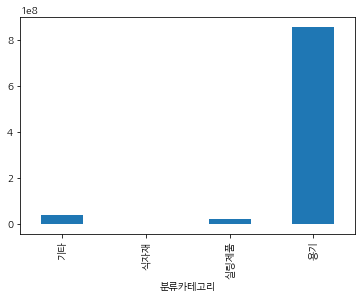

In [13]:
grouped.plot.bar()

In [11]:
xx = grouped['영업이익']
xx

분류카테고리
기타       40684800.0
식자재        -29320.0
실링제품     25258960.0
용기      857140690.0
Name: 영업이익, dtype: float64

In [137]:
packing_profit = df_new[df_new['분류카테고리'] == '용기']['영업이익'].sum()
food_profit = df_new[df_new['분류카테고리'] == '식자재']['영업이익'].sum()
sealing_profit = df_new[df_new['분류카테고리'] == '실링제품']['영업이익'].sum()
etc_profit = df_new[df_new['분류카테고리'] == '기타']['영업이익'].sum()

In [138]:
df_profit = pd.DataFrame({'용기': [packing_profit], '식자재': [food_profit], '실링제품': [sealing_profit], '기타': [etc_profit]})
df_profit

,용기,식자재,실링제품,기타
0,761433490.0,14260.0,22666130.0,31315960.0


In [134]:
df_category.loc[df_category['분류카테고리'] == '식자재']


,Unnamed: 0,Unnamed: 0.1,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,상품구매금액,상품명,상품번호,상품별 추가할인금액,수령인 주소,주문경로,주문번호,주문일시,주문자ID,카드사,쿠폰 할인금액,판매가,품목번호,친환경,사은품,회원,주문수량,총수량,분류카테고리
1218,1441,1440,무통장입금,28620.0,교환안함,0,D-20190114-0001242-04,무료,2019-01-17 오후 6:14,2019-01-21 오전 5:32,0,42880,사자표 볶음춘장 10kg 1박스,1146.0,8100,부산광역시 강서구 지사동,PC쇼핑몰,20190114-0001242,2019-01-14 오후 10:27,loveyou80,기타,0,42880,46414,False,False,True,1,1,식자재


<BarContainer object of 4 artists>

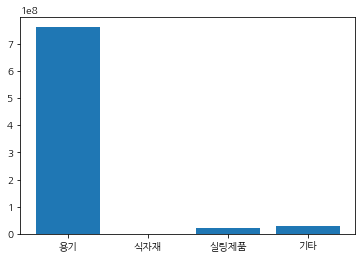

In [152]:
카테고리_x = ["용기","식자재","실링제품","기타"]
카테고리_y = [761433490.0,14260.0,22666130.0,31315960.0]


plt.bar(카테고리_x, 카테고리_y)


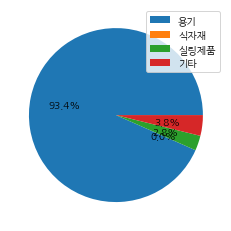

In [153]:

plt.pie(카테고리_y, autopct="%0.1f%%")
plt.legend(카테고리_x)
plt.show()

In [ ]:

df_new['영업이익'] = df_category["상품구매금액"] - df_category['공급원가']*df_category['주문수량']
df_new

grouped = df_['영업이익'].groupby(df_new['분류카테고리']).sum()
grouped
df_log['주문 시 회원등급']